Here, I try ro build a Fake News Detection Project using Python. For this project, we use libraries like pandas, NumPy, and scikit-learn, with TfidfVectorizer and PassiveAggressiveClassifier.

First, we install the required libraries.

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

Now, we import these libraries into our Notebook.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Then, we load the 'news.csv' dataset which I took from Kaggle uploaded by Antonios Kokiantonis.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving news.csv to news.csv


In [ ]:
# Load the dataset
df = pd.read_csv('news.csv')

Explore the dataset to understand what's the dataset all about.

In [ ]:
print(df.head())
print(df.info())
print(df['label'].value_counts())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 

The dataset I'm working with contains 6,335 entries, each representing a news article, and includes four columns: Unnamed: 0, title, text, and label. The Unnamed: 0 column appears to be an index or identifier, which may not be necessary for your analysis and could be dropped. The title and text columns contain the main content of the news articles, with title holding the article's headline and text containing the full article. The label column classifies each article as either "REAL" or "FAKE," with the dataset showing a balanced distribution: 3,171 articles are labeled as "REAL," and 3,164 are labeled as "FAKE."

Now, clean the data by ensuring there are no missing values. If there are any, will be removing them.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
df = df.dropna()

# Reset index after dropping
df = df.reset_index(drop=True)

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


So, yeah, over here, there are no missing values.

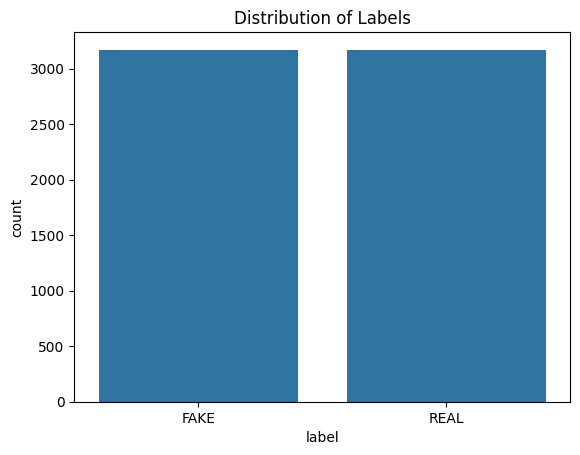

In [ ]:
#Visualize Label Distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

In the dataset, there happens to be equal number of 'REAL' as well as 'FAKE' data.

Now, let's split the data into training and testing data.

In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Here, we used 'train_test_split' function from  the sklearn.model_selection module to randomly split the data into training and testing sets.
Using, test_size=0.2, we split the data into 80:20 ration meaning 80% for training data and 20% for testing data.
'random_state'  ensures that every time you run the code, the data will be split in the same way. Thus, 'random_state=7' parameter ensures that the split is reproducible.

In [ ]:
# Initialize the vectorizer with appropriate parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
tfidf_test = tfidf_vectorizer.transform(X_test)

Here, we used the TfidfVectorizer to convert the text data from the news articles into numerical features that can be used by a machine learning model. We first initialized the vectorizer, instructing it to ignore common English stop words and to exclude words that appear in more than 70% of the documents, as these are likely not informative. We then fitted the vectorizer on the training data to learn the vocabulary and transformed this data into a matrix of TF-IDF features. Finally, we transformed the test data using the same vectorizer, ensuring that both the training and test data are represented in the same feature space for model training and evaluation.

In [ ]:
# Initialize the classifier
pac = PassiveAggressiveClassifier(max_iter=50)

# Fit the classifier on the training data
pac.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

Now, here we initialized a PassiveAggressiveClassifier with a maximum of 50 iterations and trained it on the TF-IDF features of the training data. The classifier learns from the data and adjusts its parameters to improve its ability to classify news articles as "REAL" or "FAKE."

In [ ]:
# Predict on the test data
y_pred = pac.predict(tfidf_test)

After training the PassiveAggressiveClassifier with the training data, you use it to make predictions on the test data. The predict method assigns labels to the test samples based on what the model has learned, allowing you to evaluate the classifier's performance by comparing these predictions to the actual labels.

In [ ]:
# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 92.82%


Then, we calculte the accuracy score for our model using the test data. It does so by comparing the true labels of the test data with the predicted labels and printing the accuracy as a percentage, showing how often the classifier correctly predicted the labels.

Here, it gave a score of 92.82% which is a pretty good score which states that the model has learned to effectively differentiate between real and fake news based on the features provided.

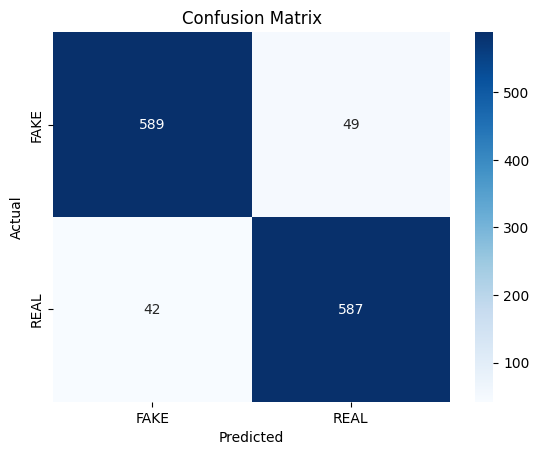

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Then, a confusion matrix was plotted. Here, we got 589 True Postives, 49 False Positives, 42 False Negatives and 587 True Negatives.

In [ ]:
#Get a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



The classification report states that the fake news detection model performs pretty well. For the "FAKE" class, it has a precision of 93%, meaning 93% of the articles predicted as "FAKE" are correctly classified, and a recall of 92%, indicating that 92% of actual "FAKE" articles were correctly identified. The F1-score for "FAKE" is 93%, showing a balanced performance. For the "REAL" class, the model has a precision of 92% and a recall of 93%, with an F1-score of 93%. Overall, the model achieves an accuracy of 93%

Now, we try to imporovise the model by handling class imbalances.

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.label == 'REAL']
df_minority = df[df.label == 'FAKE']

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=7)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=7).reset_index(drop=True)

# Update X and y
X = df_upsampled['text']
y = df_upsampled['label']

We do that by addressing the class imbalance in your dataset by upsampling the minority class, "FAKE" news, to match the number of majority class, "REAL" news. It first separates the data into majority and minority classes, then creates an upsampled version of the minority class using sampling with replacement to ensure it has the same number of instances as the majority class. This upsampled minority class is combined with the majority class and the entire dataset is shuffled to ensure randomness. Finally, the features and labels are updated with the balanced dataset, preparing it for subsequent model training.

Now, we'll go for Hyperparameter Tuning.

In [ ]:
# Define updated parameter grid with increased max_iter
param_grid = {
    'max_iter': [100, 200, 300],
    'C': [0.01, 0.1, 1.0]
}

# Initialize GridSearch with updated parameter grid
grid = GridSearchCV(pac, param_grid, cv=5, scoring='accuracy')

# Fit GridSearch
grid.fit(tfidf_train, y_train)

# Best parameters after tuning
print(f'Best Parameters: {grid.best_params_}')

# Use the best estimator
best_pac = grid.best_estimator_

# Predict and evaluate
y_pred = best_pac.predict(tfidf_test)
print(f'Accuracy after tuning: {accuracy_score(y_test, y_pred)}')


Best Parameters: {'C': 0.01, 'max_iter': 200}
Accuracy after tuning: 0.9313338595106551


The hyperparameter tuning process with the GridSearchCV was updated to explore a broader range of max_iter values, including 100, 200, and 300, and C values of 0.01, 0.1, and 1.0. After fitting the grid search on the training data, the best parameters identified were C = 0.01 and max_iter = 200. This configuration improved the model’s performance, achieving an accuracy of approximately 93.13% on the test set. This tuning effectively addressed previous convergence warnings and optimized the model, leading to enhanced prediction accuracy and overall better performance.

Now, we'll try a different approach by using Logistic Regression approach.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(tfidf_train, y_train)
y_pred_lr = lr.predict(tfidf_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}')

Logistic Regression Accuracy: 0.9171270718232044


It gave an accuracy score of around 91.7% which happens to be lower than what we got using 'Passive Agressive Classifier'.

So, we can kinda say that in this case, fir this dataset, Passive Agressive Classifier model performs better than Logistic Regression for Fake News Detection.